In [78]:
# Dataset 1 : Wines

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import MinMaxScaler
# model 
from sklearn.cluster import KMeans
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('wine_quality_ica1.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['type'])

#output
y = df['type']

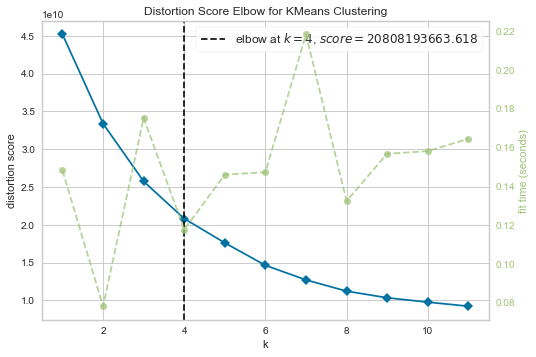

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
# Using the elbow method to find the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [69]:
# Visualising the clusters in with infinite features

import plotly.express as px

a = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.apply(LabelEncoder().fit_transform)

kmeans = KMeans(
        n_clusters=5, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)

df['label']=kmeans.labels_
polar=df.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

In [70]:
# Loop for different number of clusters

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)
kmeans.fit(df_scaled)

# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(3,12)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    print(f' Number of Clusters: {each_value} | silhouette_score_average : {silhouette_score_average}')

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' Number of Clusters: {key} | Number of Negative Values: {val}')




 Number of Clusters: 3 | silhouette_score_average : 0.2867131551473984
 Number of Clusters: 4 | silhouette_score_average : 0.2668361526124076
 Number of Clusters: 5 | silhouette_score_average : 0.23545022096863288
 Number of Clusters: 6 | silhouette_score_average : 0.2220260023172337
 Number of Clusters: 7 | silhouette_score_average : 0.20717733262996932
 Number of Clusters: 8 | silhouette_score_average : 0.19961362728168416
 Number of Clusters: 9 | silhouette_score_average : 0.1872307855658786
 Number of Clusters: 10 | silhouette_score_average : 0.18611114804464363
 Number of Clusters: 11 | silhouette_score_average : 0.18148164967102987
 Number of Clusters: 3 | Number of Negative Values: 26
 Number of Clusters: 4 | Number of Negative Values: 53
 Number of Clusters: 5 | Number of Negative Values: 50
 Number of Clusters: 6 | Number of Negative Values: 35
 Number of Clusters: 7 | Number of Negative Values: 73
 Number of Clusters: 8 | Number of Negative Values: 82
 Number of Clusters: 9 |

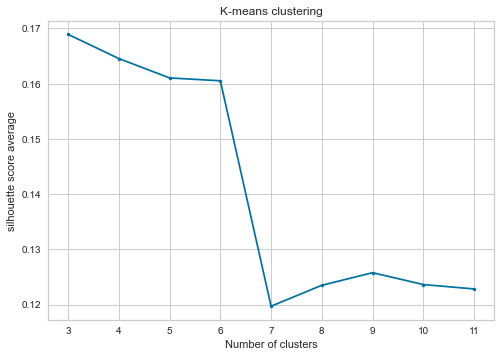

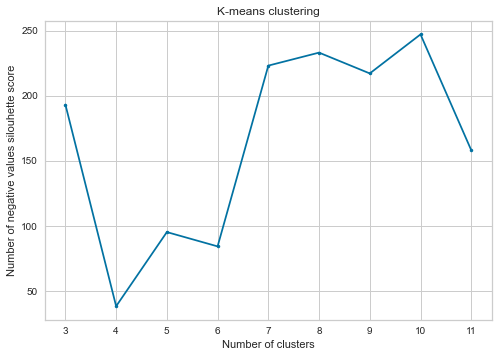

In [64]:
# Loop for different number of clusters

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)
kmeans.fit(df_scaled)

# re-do our loop, try to find values with no negative scores, or one with the least!!
negative_values = [0 for i in range(3,12)]

silhouette_score_average_list = []

# remember, anything past 15 looked really good based on the inertia
number_of_clusters = [i for i in range(3,12)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for i in number_of_clusters:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    silhouette_score_average_list.append(silhouette_score_average)
    
    # iterate through to find any negative values
    for k in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if k < 0:
            negative_values[i-3] += 1

number_of_clusters = [i for i in range(3,12)]

fig1, ax1 = plt.subplots()
ax1.set_title('K-means clustering')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('silhouette score average')
ax1.plot(number_of_clusters, silhouette_score_average_list, marker=".")

fig, ax = plt.subplots()
ax.set_title('K-means clustering')
ax.set_xlabel('Number of clusters')
ax.set_ylabel("Number of negative values silouhette score")
ax.plot(number_of_clusters, negative_values, marker=".")

plt.show()


No handles with labels found to put in legend.


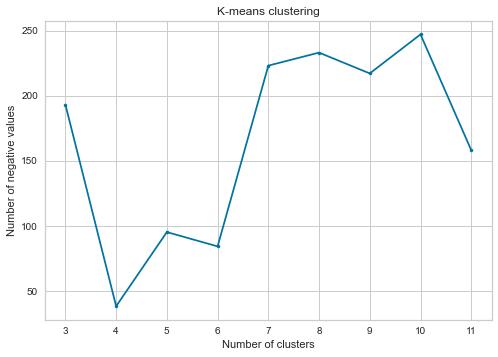

In [58]:
number_of_clusters = [i for i in range(3,12)]

fig, ax = plt.subplots()
ax.set_title('K-means clustering')
ax.set_xlabel('Number of clusters')
ax.set_ylabel("Number of negative values")
ax.plot(number_of_clusters, negative_values, marker=".")
ax.legend()
plt.show()

time for running the algorithm = 14.215196421995643 s


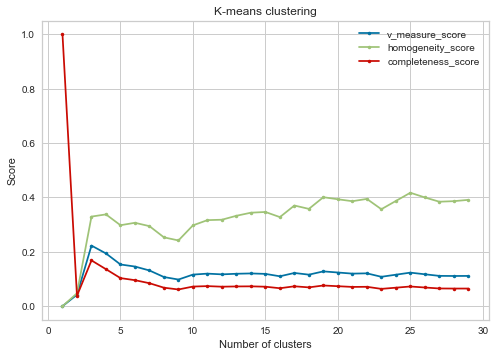

In [80]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score

# define our scaler
scaler = MinMaxScaler()
# scale down our data
X_scaled = scaler.fit_transform(X)

v_measure_score_list = []
homogeneity_score_list = []
completeness_score_list = []

time1 = time.perf_counter()

for i in range(1,30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    y_pred1 = kmeans.fit_predict(X)

    v_measure_score_list.append(v_measure_score(y,y_pred1,beta =1.0))
    homogeneity_score_list.append(homogeneity_score(y,y_pred1))
    completeness_score_list.append(completeness_score(y,y_pred1))
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')
    
number_of_clusters = [i for i in range(1,30)]
fig, ax = plt.subplots()
ax.set_title('K-means clustering')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score')
ax.plot(number_of_clusters, v_measure_score_list, marker=".", label="v_measure_score")
ax.plot(number_of_clusters, homogeneity_score_list, marker=".", label="homogeneity_score")
ax.plot(number_of_clusters, completeness_score_list, marker=".", label="completeness_score")
ax.legend()
plt.show()

In [29]:
# model 
from sklearn.cluster import KMeans

# Training the K-means model on the dataset
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
X_pca_and_kmeans = kmeans.fit_transform(X_scaled)
print(X_pca_and_kmeans.shape)

(6497, 4)


In [30]:
df_new = pd.DataFrame(X_pca_and_kmeans, columns =['PC1','PC2','PC3','PC4'] )

df_new['type'] = df.type
df_new.head()

,PC1,PC2,PC3,PC4,type
0,1.113474,1.066813,1.169328,0.632449,1
1,0.530358,0.827368,0.728016,0.867866,1
2,0.698973,0.758953,0.765889,0.745276,1
3,0.787248,0.840909,0.872706,0.607350,1
4,0.787248,0.840909,0.872706,0.607350,1


In [31]:
# save the data
df_new.to_csv('wine_quality_Ica_and_Kmeans.csv', index=False)